# Training a convnet on a small dataset

# Training, Validation, and Testing Datasets

In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/Users/Chris Weinreich/Documents/cats_and_dogs'

In [3]:
base_dir = '/Users/Chris Weinreich/Documents/cats_and_dogs_small'

In [4]:
os.mkdir(base_dir)

Create train, validation, and test directories

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [6]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [7]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Cats and Dogs Train Directories

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [9]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

Cats and Dogs Validation Directories

In [10]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [11]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

Cats and Dogs Test Directories

In [12]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [13]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Copy cats into directories - 1000 in Training, 500 in Validation, 500 in Test

In [87]:
#Copy Train Data from Original to Small Directory
fnames = ['cat.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [88]:
#Copy Validation data from Original to Small Directory
fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 4500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [89]:
#Copy Test data from Original to Small Directory
fnames = ['cat.{}.jpg'.format(i) for i in range(4500, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

Copy Dogs into directories - 1000 in Training, 500 in Validation, 500 in Test

In [90]:
#Copy Train Data from Original to Small Directory
fnames = ['dog.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [91]:
#Copy Validation data from Original to Small Directory
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 4500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [92]:
#Copy Test data from Original to Small Directory
fnames = ['dog.{}.jpg'.format(i) for i in range(4500, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Count how many pictures are in each training split (train. validation, test)

In [93]:
print('total train cat images:', len(os.listdir(train_cats_dir)))

total train cat images: 3000


In [94]:
print('total train dog images:', len(os.listdir(train_dogs_dir)))

total train dog images: 3000


In [95]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 2000


In [96]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 2000


In [97]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 2000


In [98]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 2000


# Building the Network - Compile Model

In [43]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Configure model for training

In [45]:
from tensorflow.keras import optimizers

In [46]:
model.compile(loss='binary_crossentropy',optimizer='RMSProp', metrics=['acc'])

# Data Preprocessing

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [77]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [79]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [80]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


Fitting the model using a batch generator

In [40]:
history = model.fit(
train_generator, 
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

NameError: name 'model' is not defined

In [66]:
model.save('cats_and_dogs_small_1.h5')

# Plot curves of losses and accuarcy during training

from numpy import loadtxt
from tensorflow.keras.models import load_model

history = load_model('cats_and_dogs_small_1.h5')

history.summary()

In [37]:
import matplotlib.pyplot as plt

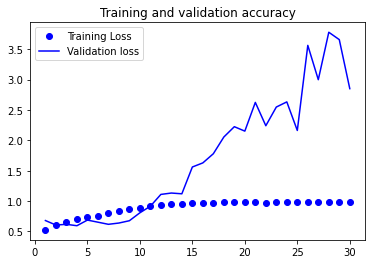

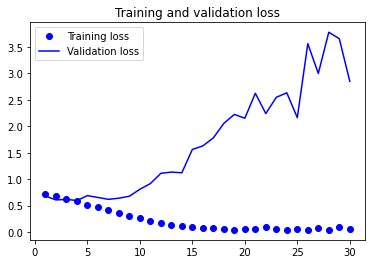

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

# Data Augmentation

In [99]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Displaying Random Augmented Training Images

In [100]:
from tensorflow.keras.preprocessing import image

In [101]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

In [102]:
#Convert to numpy array
x = image.img_to_array(img)

In [103]:
#Reshape to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

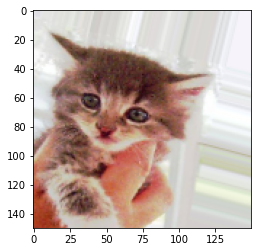

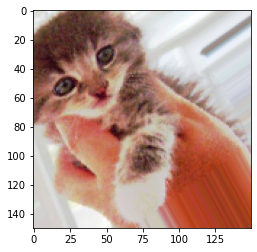

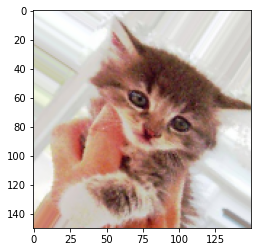

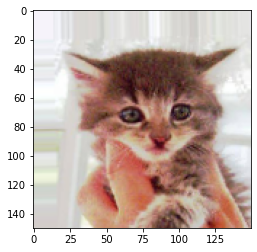

In [104]:
#Generate batches for random transformed images. Break the loop
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

# New Convolutional Network with Dropout

In [105]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(215, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [107]:
model.compile(loss='binary_crossentropy',
             optimizer='RMSprop',
             metrics=['acc'])

In [108]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [109]:
#The validation set shoule NOT be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

In [110]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 6000 images belonging to 2 classes.


In [111]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 4000 images belonging to 2 classes.


In [112]:
from tensorflow.keras import backend as K

In [113]:
import tensorflow as tf

In [114]:
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
#jit_level = tf.compat.v1.OptimizerOptions.ON_1
#config.graph_options.optimizer_options.global_jit_level = jit_level
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [116]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 40s 399ms/step - loss: 0.6921 - acc: 0.5422 - val_loss: 0.8204 - val_acc: 0.5119
Epoch 2/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6657 - acc: 0.5974 - val_loss: 0.6178 - val_acc: 0.6719
Epoch 3/100
100/100 [==============================] - 23s 226ms/step - loss: 0.6778 - acc: 0.6275 - val_loss: 0.6183 - val_acc: 0.6775
Epoch 4/100
100/100 [==============================] - 33s 332ms/step - loss: 0.6417 - acc: 0.6347 - val_loss: 0.6173 - val_acc: 0.6731
Epoch 5/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6294 - acc: 0.6513 - val_loss: 0.5874 - val_acc: 0.6950
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6362 - acc: 0.6548 - val_loss: 0.5651 - val_acc: 0.6944
Epoch 7/100
100/100 [==============================] - 30s 300ms/step - loss: 0.6261 - acc: 0.6577 - val_loss: 0.5667 - val_acc: 0.6856
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 19s 194ms/step - loss: 0.4730 - acc: 0.7903 - val_loss: 0.4043 - val_acc: 0.8381
Epoch 62/100
100/100 [==============================] - 19s 194ms/step - loss: 0.4188 - acc: 0.8166 - val_loss: 0.3693 - val_acc: 0.8681
Epoch 63/100
100/100 [==============================] - 19s 195ms/step - loss: 0.4227 - acc: 0.8100 - val_loss: 0.5131 - val_acc: 0.7956
Epoch 64/100
100/100 [==============================] - 19s 195ms/step - loss: 0.4083 - acc: 0.8234 - val_loss: 0.4268 - val_acc: 0.8175
Epoch 65/100
100/100 [==============================] - 19s 194ms/step - loss: 0.4282 - acc: 0.8150 - val_loss: 0.4181 - val_acc: 0.7937
Epoch 66/100
100/100 [==============================] - 19s 194ms/step - loss: 0.4370 - acc: 0.8084 - val_loss: 0.3084 - val_acc: 0.8888
Epoch 67/100
100/100 [==============================] - 19s 194ms/step - loss: 0.4359 - acc: 0.8119 - val_loss: 0.3107 - val_acc: 0.8813
Epoch 68/100
100/100 [===================

In [117]:
model.save('cats_and_dogs_data_aug.h5')

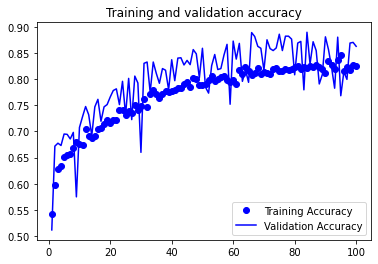

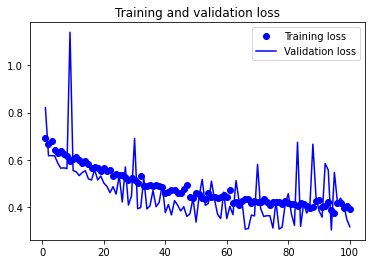

In [153]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [154]:
plt.savefig('cats_and_dogs_data_aug.png')

<Figure size 432x288 with 0 Axes>

# Using a pretrained convnet

In [121]:
from tensorflow.keras.applications import VGG16

In [122]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [123]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Extracting features without data augmentation

In [146]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [129]:
base_dir = '/Users/Chris Weinreich/Documents/cats_and_dogs_small'

In [130]:
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [147]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [150]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150 , 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        print(i, features_batch.shape)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [151]:
train_features, train_labels = extract_features(train_dir, 41)

Found 6000 images belonging to 2 classes.
0 (20, 4, 4, 512)
1 (20, 4, 4, 512)
2 (20, 4, 4, 512)


ValueError: could not broadcast input array from shape (20,4,4,512) into shape (1,4,4,512)

In [ ]:
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 2000)

In [1]:
#Copyright 
#Deep Learning with Francois Chollet, 2018
#Manning Publication Co. All right reserved